# BackTest——简单配对交易日度数据策略测试（支持做空）
@author: Jerry
@contact: lvjy3.15@sem.tsinghua.edu.com
@file: demo_pair_trade.py
@time: 2016/5/20 19:46

* 均线差 = 均线A/均线B
* 短期均线(2天)差突破长期均线(20天)差时做多B做空A(比例50%)
* 短期均线(2天)差跌破长期均线(20天)差时做多A做空B(比例50%)
* 测试期 2013-01-01 到2013-12-30 十二个个月

######## Reading data ########
Get 216 obersevations from 20130104 to 20131129
########     Done     ########
-----------Performance Analysis-------------
Sharpe ratio : 0.165
Average year return : 0.005
Maximum draw down : -0.067
Annualized return volatility : 0.029


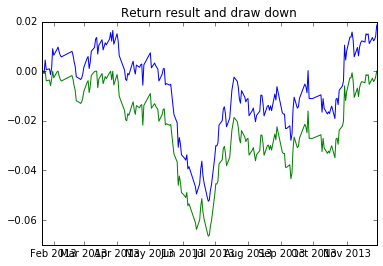

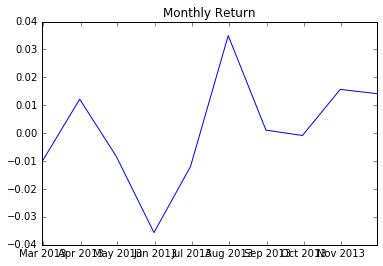

--------------Rsik Analysis----------------
Average PnL : 9202.6
Average cash ratio : 0.521
Average leverage : 0.479
Winning rate : 0.517
--------------------End--------------------


In [1]:
# -*- encoding=utf8 -*-
from backtest import BackTest
%matplotlib inline

class Strategy(BackTest):
	def __init__(self,model_name, begin_time, end_time, begin_equity, fee,
	             path, universe,freq,length, lag, short):
		BackTest.__init__(self,model_name, begin_time, end_time, begin_equity, fee,
	             path, universe,freq,length, lag, short)

	def handle_data(self):
		'''
		The trade strategy part
		:return: none
		'''

		MA5 = self.strat.MA(5, 'close')  # get MA5
		MA20 = self.strat.MA(20, 'close')  # get MA10
		d1 = MA20['600886.SH'] / MA20['600674.SH']
		d2 = MA5['600886.SH'] / MA5['600674.SH']
		if d2 < d1:
			self.broker.order_pct_to('600886.SH', 0.25)
			self.broker.order_pct_to('600674.SH', -0.25)

		else:

			self.broker.order_pct_to('600886.SH', -0.25)
			self.broker.order_pct_to('600674.SH', 0.25)

def main():
	bt = Strategy(model_name='mm',
	              begin_time="2013-01-01",
	              end_time="2013-12-01",
	              path='E:\\data',
	              universe = ['600886.SH','600674.SH'],
	              begin_equity=  100000000,
	              fee = 0.002,
	              short=True,
	              freq =2,
				  length=10,
				  lag=1)
	perf, risk = bt.start()

if __name__ == '__main__':
	main()